# #  SVM Mengenai Predicting Pulsar Star 

**Support Vector Machines** 
(disingkat SVM) adalah algoritme pembelajaran mesin yang digunakan untuk tujuan klasifikasi dan regresi.
SVM adalah salah satu algoritme pembelajaran mesin yang kuat untuk tujuan klasifikasi, regresi, dan deteksi pencilan. 
Pengklasifikasi SVM membangun model yang menetapkan titik data baru ke salah satu kategori yang diberikan. 
Dengan demikian, SVM dapat dipandang sebagai pengklasifikasi linier biner non-probabilistik.

Algoritma SVM yang asli dikembangkan oleh Vladimir N Vapnik dan Alexey Ya. Chervonenkis pada tahun 1963. 
Pada saat itu, algoritme ini masih dalam tahap awal. Satu-satunya kemungkinan adalah menggambar hyperplane untuk pengklasifikasi linier. 
Pada tahun 1992, Bernhard E. Boser, Isabelle M Guyon dan Vladimir N Vapnik menyarankan sebuah cara untuk membuat pengklasifikasi non-linear dengan menerapkan trik kernel pada hyperplane dengan margin maksimum. 
Standar saat ini diusulkan oleh Corinna Cortes dan Vapnik pada tahun 1993 dan diterbitkan pada tahun 1995.

SVM dapat digunakan untuk tujuan klasifikasi linier. Selain melakukan klasifikasi linier, SVM dapat secara efisien melakukan klasifikasi non-linier 
dengan menggunakan **trik kernel**. Trik ini memungkinkan kita untuk secara implisit memetakan input ke dalam ruang fitur berdimensi tinggi.

In [235]:
import numpy as np # aljabar linear
import pandas as pd # pemerosesan data dari csv file predicting pulsar star
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # untuk statistika data visualisasi
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_train.csv
/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_test.csv


In [236]:
dfTrain=pd.read_csv("/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_train.csv")
dfTest=pd.read_csv("/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_test.csv")

Kode sumber yang berikan digunakan untuk memuat data dari berkas CSV ke dalam DataFrame pandas di Python.
Setelah mengeksekusi baris-baris ini, dfTrain dan dfTest akan berisi data dari file CSV yang bersangkutan, 
sehingga dapat melakukan berbagai analisis data, prapemrosesan, dan tugas-tugas pembelajaran mesin pada data yang dimuat.

buat yang dibawah ini merupakan batas atas dan batas bawah datasheet yang ada, dari head ke tail

In [237]:
dfTrain.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [238]:
dfTrain.tail(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
12518,100.656250,42.408438,0.396806,0.472521,23.314381,52.123645,2.154456,3.743475,0.0
12519,124.742188,51.234791,-0.085093,-0.422925,2.815217,14.863936,8.231859,94.205382,0.0
12520,115.375000,52.625891,0.448982,0.104404,3.354515,18.365749,7.358722,65.764006,0.0
12521,90.570312,54.453203,1.238812,0.880610,152.419732,73.971777,-0.933088,-0.371532,1.0
12522,124.828125,50.586731,0.233563,-0.286908,2.342809,13.949966,9.226188,117.308146,0.0
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0
12527,120.726562,50.472256,0.346178,0.184797,0.769231,11.792603,17.662222,329.548016,0.0


In [239]:
dfTrain.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [240]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [241]:
for i in dfTrain.columns:
    dfTrain[i].fillna(0,inplace=True)

dfTrain.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [258]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,f1_score,recall_score ,precision_score,roc_curve,confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix

In [243]:
y = dfTrain['target_class']
X = dfTrain.drop('target_class',axis=1)
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=25)

In [244]:
model_1=RandomForestClassifier(max_depth=2,random_state=2)
model_1.fit(X_train,y_train)
pred = model_1.predict(X_valid)
print(f'Accuracy of the training model is {(accuracy_score(y_valid,pred)*100)}%')

# kode ini menunjukkan alur kerja dasar untuk mengevaluasi akurasi model dan melakukan pengacakan.

Accuracy of the training model is 97.6855546687949%


In [245]:
dfTest.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [259]:
dfTest.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.538134,-0.809708,-0.741685,-0.300550,-0.252476,0.231017,0.128502,NaN
Standard deviation of the integrated profile,0.538134,1.000000,-0.483830,-0.539889,0.026740,-0.021219,0.024427,0.022834,NaN
Excess kurtosis of the integrated profile,-0.809708,-0.483830,1.000000,0.890781,0.375555,0.322980,-0.309704,-0.183148,NaN
Skewness of the integrated profile,-0.741685,-0.539889,0.890781,1.000000,0.410589,0.335128,-0.329385,-0.195619,NaN
Mean of the DM-SNR curve,-0.300550,0.026740,0.375555,0.410589,1.000000,0.701018,-0.615204,-0.336152,NaN
Standard deviation of the DM-SNR curve,-0.252476,-0.021219,0.322980,0.335128,0.701018,1.000000,-0.711437,-0.479550,NaN
Excess kurtosis of the DM-SNR curve,0.231017,0.024427,-0.309704,-0.329385,-0.615204,-0.711437,1.000000,0.886161,NaN
Skewness of the DM-SNR curve,0.128502,0.022834,-0.183148,-0.195619,-0.336152,-0.479550,0.886161,1.000000,NaN
target_class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


****Kode df.corr() menghitung korelasi berpasangan dari kolom-kolom di dalam DataFrame pandas.****

Inilah yang dilakukan oleh setiap bagian dari kode tersebut:

1. df: Ini adalah DataFrame pandas yang ingin Anda hitung korelasinya.
2. .corr(): Ini adalah metode DataFrame pandas yang menghitung korelasi antara semua pasangan kolom dalam DataFrame. Secara default, metode ini menggunakan koefisien korelasi Pearson untuk mengukur hubungan linier antar variabel. Koefisien korelasi berkisar antara -1 hingga 1, di mana:
* 1 mengindikasikan hubungan linear positif yang sempurna,
* 0 menunjukkan tidak ada hubungan linier, dan
* -1 menunjukkan hubungan linier negatif sempurna.
Ketika menjalankan df.corr(), mesin akan membuatkan sebuah DataFrame persegi di mana baris dan kolomnya mewakili nama kolom dari DataFrame (df) asli, dan nilai di setiap sel mewakili koefisien korelasi antara pasangan kolom yang sesuai. Matriks korelasi ini dapat berguna untuk memahami hubungan antar variabel, mengidentifikasi multikolinieritas, dan memilih fitur untuk model pembelajaran mesin.

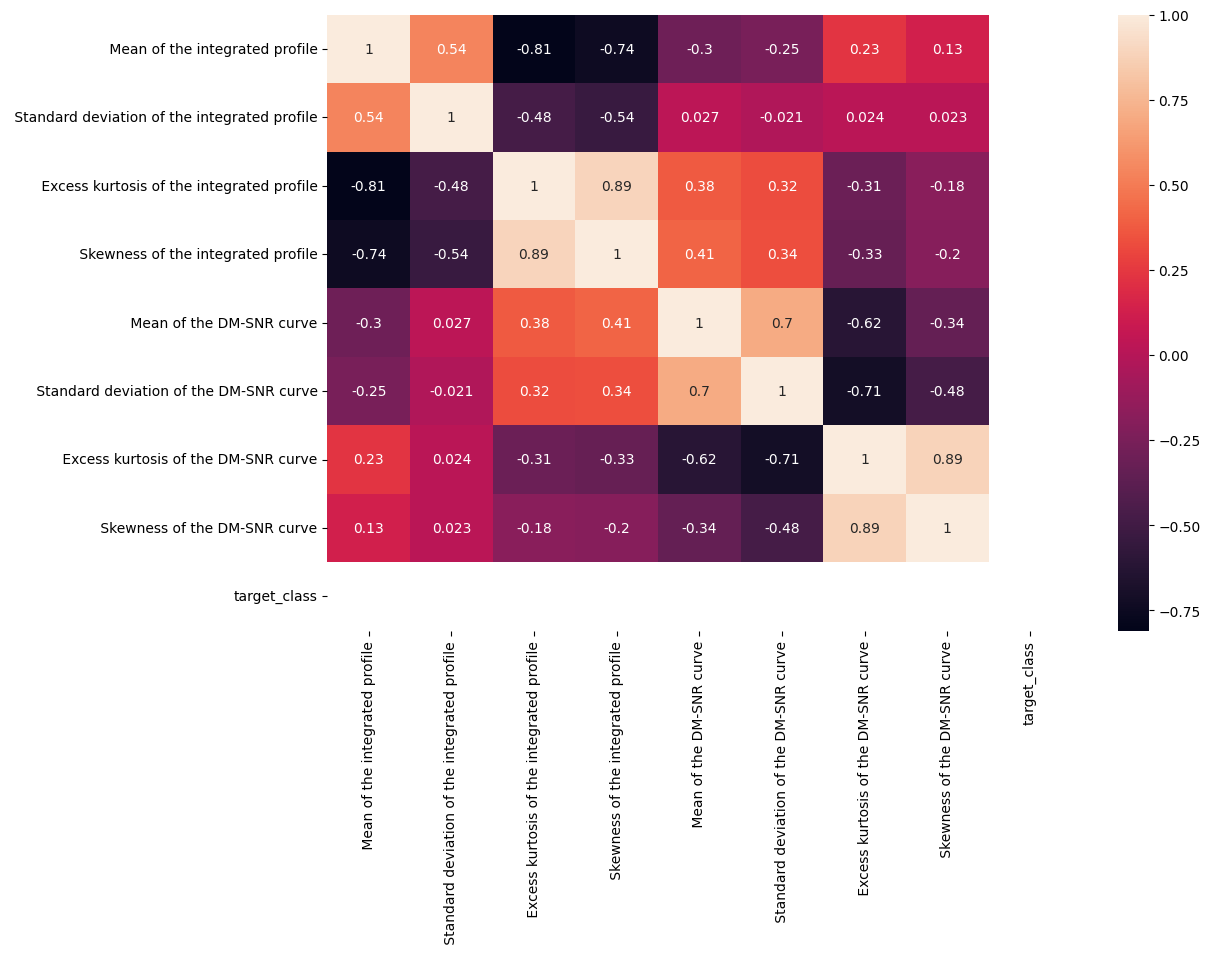

In [261]:
fg,ax=plt.subplots(figsize=(12,8))
ax=sns.heatmap(dfTest.corr(),annot=True)

In [247]:
dfTest.isnull().sum()

#  kode ini adalah cara yang berguna untuk mengidentifikasi dan menghitung nilai yang hilang dengan cepat di DataFrame.

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64

In [248]:
for i in dfTest.columns:
    dfTest[i].fillna(0,inplace=True)
    
dfTest.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [249]:
target=dfTest['target_class']
features=dfTest.drop('target_class',axis=1)
pred_target=model_1.predict(features)
print(pred_target)

[0. 1. 0. ... 0. 0. 0.]


# Implementasi Support Vector Machines(SVM)

In [250]:
model_2 = SVC() 
model_2.fit(X_train,y_train)
y_pred=model_2.predict(X_valid)

# melatih model SVM pada data pelatihan dan kemudian menggunakan model yang telah dilatih untuk memprediksi label kelas untuk data validasi.

In [251]:
print(f'Nilai akurasi model dengan hiperparameter default: {(accuracy_score(y_valid,y_pred)*100)}%')

Nilai akurasi model dengan hiperparameter default: 97.32641660015962%


In [252]:
target=dfTest['target_class']
features=dfTest.drop('target_class',axis=1)
pred_target=model_1.predict(features)
print(pred_target)

[0. 1. 0. ... 0. 0. 0.]


In [253]:
print("F1-score",f1_score(y_valid,y_pred))
print("Recall: ",recall_score(y_valid,y_pred))
print("percision: ",precision_score(y_valid,y_pred))
print("accuracy:", metrics.accuracy_score(y_valid,y_pred))
print(classification_report(y_valid, y_pred))

F1-score 0.8430913348946135
Recall:  0.7627118644067796
percision:  0.9424083769633508
accuracy: 0.9732641660015962
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2270
         1.0       0.94      0.76      0.84       236

    accuracy                           0.97      2506
   macro avg       0.96      0.88      0.91      2506
weighted avg       0.97      0.97      0.97      2506



[[2259   11]
 [  56  180]]


(<Figure size 400x600 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

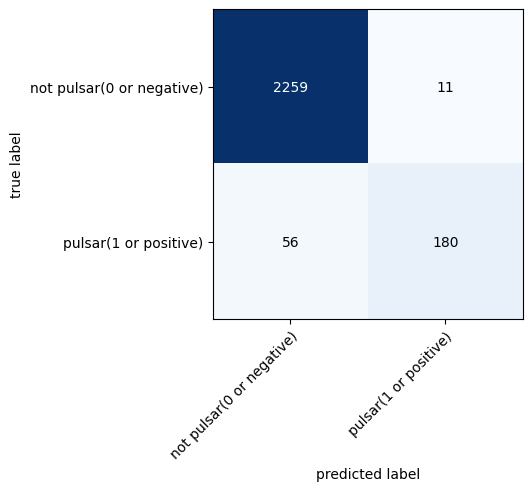

In [268]:
conf_matrix=confusion_matrix(y_valid,y_pred)
print(conf_matrix)
plot_confusion_matrix(conf_matrix,class_names=["not pulsar(0 or negative)","pulsar(1 or positive)"],figsize=(4,6))

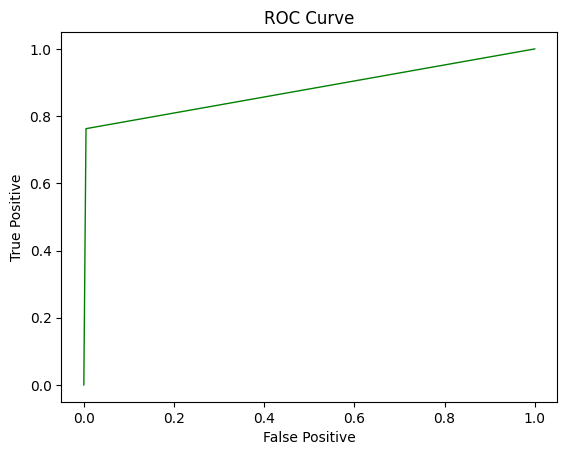

In [264]:
FPR, TPR, cutoffs = metrics.roc_curve(y_valid,y_pred,pos_label=1)
plt.plot(FPR,TPR,c='green',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

# Sekian dari Saya, Terima Kasih